In [ ]:
#Analysis: 
   # 1. Urban Areas have more rides than other areas.
   # 2. Fares in rural areas are higher.
   # 3. Prices appear to correlate with ride activity. 
    

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Read the City and Ride Data
# Combine the data into a single dataset
merged_df = pd.merge(city_data_to_load, ride_data_to_load, how='inner')
citygroups_df = merged_df.groupby("city")

#glance at the grouped data...
citygroups_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
28,Williamsstad,59,Urban,2018-01-23 17:51:24,19.62,125986195523
29,Williamsstad,59,Urban,2018-03-29 21:43:04,35.58,4747780858464
30,Williamsstad,59,Urban,2018-02-13 20:07:49,33.72,3796713212942
31,Williamsstad,59,Urban,2018-05-01 01:26:21,26.81,4542954169892
32,Williamsstad,59,Urban,2018-02-23 17:42:40,4.68,9109973457376


In [2]:
totalFare = citygroups_df["fare"].sum()
countFare = citygroups_df["fare"].count()
totalRides = citygroups_df["city"].count()
totalDrivers = citygroups_df["driver_count"].sum()
averageFare = citygroups_df["fare"].mean()

# Display the data table for preview
city_df = merged_df.drop_duplicates(subset="city")
city_df.drop(["driver_count", "date", "fare", "ride_id"], axis=1, inplace=True)
city_df.head()

/Users/epearson/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,city,type
0,Richardfort,Urban
28,Williamsstad,Urban
51,Port Angela,Urban
70,Rodneyfort,Urban
93,West Robert,Urban


In [3]:
countFare_df = pd.DataFrame(countFare)
totalRides_df = pd.DataFrame(totalRides)
totalDrivers_df = pd.DataFrame(totalDrivers)
averageFare_df = pd.DataFrame(averageFare)
totalRides_df.rename(columns={"city":"Total_Rides"}, inplace=True)

In [4]:
countFare_df.reset_index(inplace = True)
totalRides_df.reset_index(inplace = True)
totalDrivers_df.reset_index(inplace = True)
averageFare_df.reset_index(inplace = True)

In [5]:
citygroupsStats = pd.merge(pd.merge(pd.merge(pd.merge(city_df, countFare_df, on="city"), totalRides_df, on="city"), totalDrivers_df, on="city"), averageFare_df, on="city")

In [6]:
citygroupsStats_replace = citygroupsStats.rename(columns={"fare_y":"Average_Fare"})
citygroupsStats_replace.drop(["fare_x"], axis = 1, inplace=True)
citygroupsStats_replace.head()

,city,type,Total_Rides,driver_count,Average_Fare
0,Richardfort,Urban,28,1064,22.373214
1,Williamsstad,Urban,23,1357,24.362174
2,Port Angela,Urban,19,1273,23.836842
3,Rodneyfort,Urban,23,782,28.616957
4,West Robert,Urban,31,1209,25.123871


In [7]:
urbancities = citygroupsStats_replace.loc[(citygroupsStats["type"] == "Urban")]
suburbancities = citygroupsStats_replace.loc[(citygroupsStats["type"] == "Suburban")]
ruralcities = citygroupsStats_replace.loc[(citygroupsStats["type"] == "Rural")]

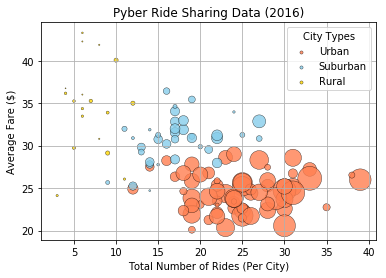

In [8]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
ax = urbancities.plot(kind='scatter', x="Total_Rides", y="Average_Fare", edgecolors = "Black", linewidths = 0.4, color="Coral", s=urbancities["driver_count"]/4, alpha=0.8, label="Urban")
suburbancities.plot(kind='scatter', x="Total_Rides", y="Average_Fare", edgecolors = "Black", linewidths = 0.4, color="SkyBlue", s=suburbancities["driver_count"]/4, alpha=0.8, label="Suburban", ax=ax)
ruralcities.plot(kind='scatter', x="Total_Rides", y="Average_Fare", edgecolors = "Black", linewidths = 0.4, color="Gold", s=ruralcities["driver_count"]/4, alpha=0.8, label="Rural", ax=ax)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid()

# Create a legend
lgnd = plt.legend(loc="upper right", scatterpoints=1, title="City Types")

# Incorporate a text label regarding circle size
lgnd.legendHandles[0]._sizes = [10]
lgnd.legendHandles[1]._sizes = [10]
lgnd.legendHandles[2]._sizes = [10]

# Save Figure
plt.savefig("../Images/RidesByCityTypeBubble.png")
plt.show()

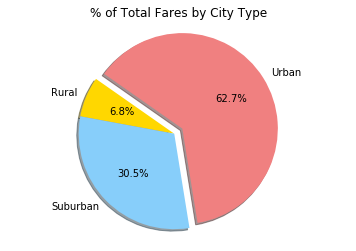

In [9]:
# Calculate Type Percents
colorTypes = ["gold", "lightskyblue", "lightcoral"]
cityTotalFare = merged_df["fare"].sum()
groupType_df = merged_df.groupby("type")
groupTypeFare = groupType_df["fare"].sum()
groupTypeFare_df = pd.DataFrame(groupTypeFare)

# Build Pie Chart
percentFare = groupTypeFare_df["fare"]/cityTotalFare
groupTypeFare_df["% Total Fares"] = percentFare
groupTypeFare_df.reset_index(inplace=True)
groupTypeFare_df.rename(columns={"type":"City Type"}, inplace=True)
farePieChart = groupTypeFare_df.plot(kind="pie", y="% Total Fares", title="% of Total Fares by City Type", labels=["Rural", "Suburban", "Urban"],
                             colors=colorTypes, autopct="%2.1f%%", explode = [0, 0, 0.1], shadow=True, startangle=145, legend=False)
farePieChart.set_ylabel('')
plt.axis('equal')

# Save Figure
plt.savefig("../Images/FaresByCity.png")

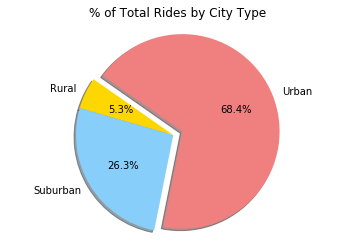

In [10]:
# Calculate Ride Percents
cityTotalRide = merged_df["ride_id"].count()
groupTypeRides = groupType_df["ride_id"].count()
groupTypeRides_df = pd.DataFrame(groupTypeRides)
percentRides = groupTypeRides_df["ride_id"]/cityTotalRide
groupTypeRides_df["% Total Rides"] = percentRides
groupTypeRides_df.head()

# Build Pie Chart
ridesPieChart = groupTypeRides_df.plot(kind="pie", y="% Total Rides", title="% of Total Rides by City Type", labels=["Rural", "Suburban", "Urban"],
                             colors=colorTypes, autopct="%2.1f%%", explode = [0, 0, 0.1], shadow=True, startangle=145, legend=False)
ridesPieChart.set_ylabel('')
plt.axis('equal')

# Save Figure
plt.savefig("../Images/RidesByCity.png")
plt.show()

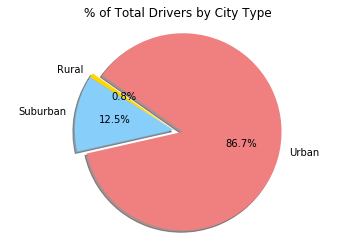

In [11]:
# Calculate Driver Percents
cityTotalDrivers = merged_df["driver_count"].sum()
groupTypeDrivers = groupType_df["driver_count"].sum()
groupTypeDrivers_df = pd.DataFrame(groupTypeDrivers)
percentDrivers = groupTypeDrivers_df["driver_count"]/cityTotalDrivers
groupTypeDrivers_df["% Total Drivers"] = percentDrivers

# Build Pie Charts
driversPieChart = groupTypeDrivers_df.plot(kind="pie", y="% Total Drivers", title="% of Total Drivers by City Type", labels=["Rural", "Suburban", "Urban"],
                             colors=colorTypes, autopct="%2.1f%%", explode = [0, 0, 0.1], shadow=True, startangle=145, legend=False)
driversPieChart.set_ylabel('')
plt.axis('equal')

# Save Figure
plt.savefig("../Images/DriversByCity.png")
plt.show()